In [1]:
#these are all the libraries that we import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth

titanic = sns.load_dataset('titanic')

In [2]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape #This will show us the shape of the dataset, length by width

(891, 15)

In [4]:
titanic.size #Total values of the dataset

13365

In [5]:
titanic.describe() #Various stat distributions of the columns

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic['who'].value_counts() #Counts the 'who' column

man      537
woman    271
child     83
Name: who, dtype: int64

In [7]:
titanic['sex'].value_counts() #Counts the 'sex' column

male      577
female    314
Name: sex, dtype: int64

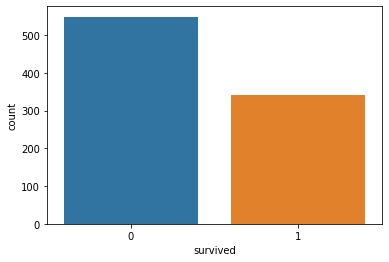

In [8]:
sns.countplot(titanic['survived'], label = "Count")

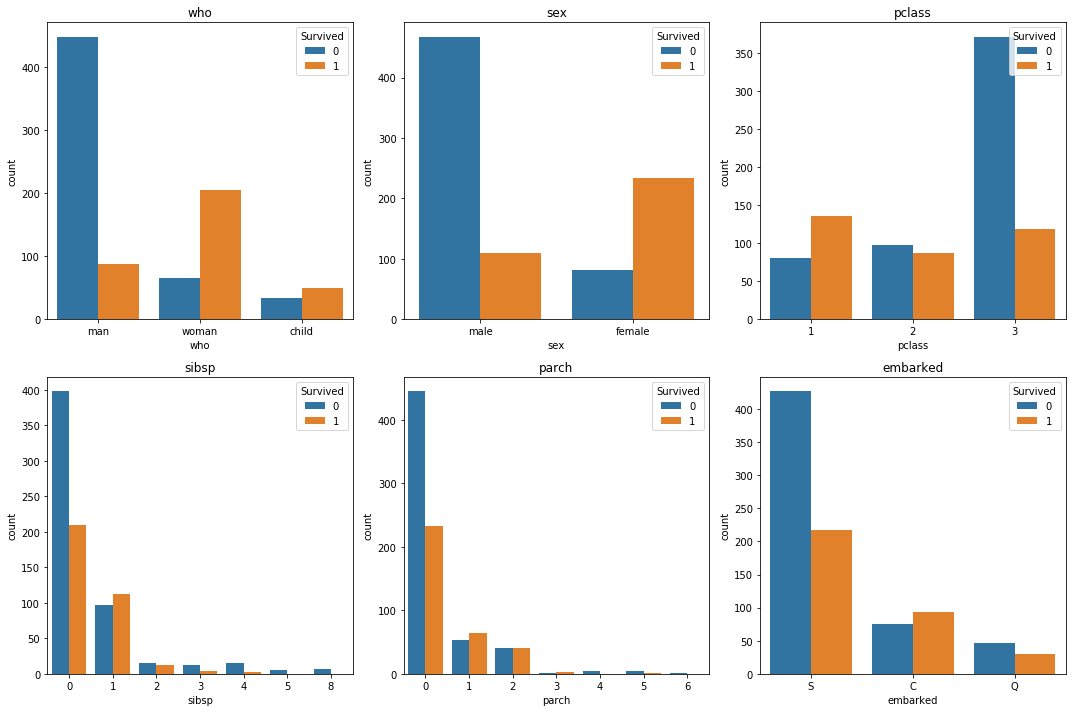

In [9]:
columns = ['who' , 'sex' , 'pclass' , 'sibsp' , 'parch' , 'embarked']

num_rows = 2
num_columns = 3

fig, axs = plt.subplots(num_rows, num_columns, figsize = (num_columns * 5, num_rows * 5))

for r in range (0, num_rows):
    for c in range(0, num_columns):
        
        i = r * num_columns + c
        ax = axs[r][c]
        sns.countplot(titanic[columns[i]], hue = titanic["survived"], ax = ax)
        ax.set_title(columns[i])
        ax.legend(title = "Survived", loc = 'upper right')

plt.tight_layout()

In [10]:
def truncate(n, decimals = 0):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier ##IGNORE THIS, THIS WAS FOR TESTING

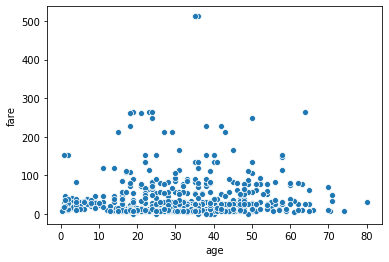

In [11]:
graph = sns.scatterplot(x = "age",  y = "fare", data = titanic) #This was just to test a theory to see what ages were more rich than others, no correlation found 

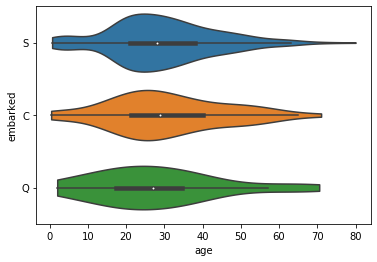

In [12]:
graph = sns.violinplot(x = "age", y = "embarked", data = titanic, cut = 0)

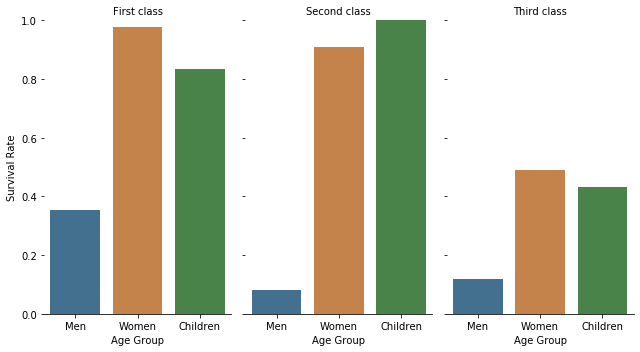

In [13]:
g = sns.catplot(x="who", y="survived", col="class", data=titanic, saturation=.5, kind="bar", ci=None, aspect=.6)

g.set_axis_labels("Age Group", "Survival Rate").set_xticklabels(["Men", "Women", "Children"]).set_titles("{col_name} {col_var}").set(ylim=(0, 1)).despine(left=True)

In [14]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [15]:
titanic.groupby('who')[['survived']].mean()

,survived
who,
child,0.590361
man,0.163873
woman,0.756458


In [16]:
titanic.pivot_table('survived', index = 'sex', columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [17]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [18]:
#This is where I check to see which values are missing from the dataset. 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
#This is where I print everything out to see how many values correlate to each subset
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [20]:
#This is where I drop certain values from the dataset because I believe they are either redundant or not needed. I will also drop things that are not complete
titanic = titanic.drop(['deck',  'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis = 1)

In [22]:
#Checking the shape of the new data, just to check the number of columns
titanic.shape

(891, 8)

In [23]:
#Checking the types of data so I can make sure to change them to numerical values for simplicity
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [24]:
#NOTE: I tried adding it based on training a new model, but my results were coming up very odd. I ended up dropping that and getting better results. I also tried averaging, but my dataset tended to flatten out a little
titanic = titanic.dropna(subset = ['embarked', 'age'])

In [25]:
#Printing the unique values so I can make sure I know what to change
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [26]:
#Checking shape once more
titanic.shape

(712, 8)

In [27]:
#This next section will be for encoding the data from types I cannot use into numeric data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#This is for encoding the sex column
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

#This is for encoding the embarked column
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [28]:
#Checking to make sure they were encoded to numerical values
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [29]:
#This is for splitting the dataset into independent and dependent variables
#Specifically, Y will be the independent variable(survived), whereas the X values will be dependent(everything else)

X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [30]:
#This section is for splitting it into training and test data to prepare for the machine learning section
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 0)

In [31]:
#This part makes sure that the data is scaled and states that all data will be within a certain range, here I am specifying that it will be set to the variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
# Log Reg, KNN, Support Vector Machine, Kernel Support Vector Machine, Gaussian Naive Bayes, Decision Tree, Random Forest

In [33]:
#This is where I create a function that will call all the various machine learning modules to test which is a best fit for the project
def MLmodels(X_train, Y_train):
    
    #Log Reg algorithm
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
    #K Nearest Neightbors algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)
    
    #Support Vector Machine algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)
    
    #Kernel SVM algorithm
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
    #Gaussian Naive Bayes algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Decision Tree algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
    #Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
    
    
    
    
    
    #Printing all the scores of each algorithm after they run to determine which one came up with the best solution for the dataset
    print('1. Logistic Regression Accuracy: ', log.score(X_train, Y_train))
    print('2. K Nearest Neighbors Accuracy: ', knn.score(X_train, Y_train))
    print('3. Support Vector Machine - Linear Accuracy: ', svc_lin.score(X_train, Y_train))
    print('4. Support Vector Machine - RBF Accuracy: ', svc_rbf.score(X_train, Y_train))
    print('5. Gaussian Naive Bayes Accuracy: ', gauss.score(X_train, Y_train))
    print('6. Decision Tree Classifier Accuracy: ', tree.score(X_train, Y_train))
    print('7. Random Forest Classification Accuracy: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest
    

In [34]:
#Call and train all the models
model = MLmodels(X_train, Y_train)

1. Logistic Regression Accuracy:  0.8108614232209738
2. K Nearest Neighbors Accuracy:  0.8689138576779026
3. Support Vector Machine - Linear Accuracy:  0.7865168539325843
4. Support Vector Machine - RBF Accuracy:  0.850187265917603
5. Gaussian Naive Bayes Accuracy:  0.799625468164794
6. Decision Tree Classifier Accuracy:  0.9925093632958801
7. Random Forest Classification Accuracy:  0.9794007490636704


In [35]:
from sklearn.metrics import confusion_matrix 
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{}"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()

[[87 17]
 [23 51]]
Model[0] Testing Accuracy = "0.7752808988764045"

[[87 17]
 [23 51]]
Model[1] Testing Accuracy = "0.7752808988764045"

[[86 18]
 [23 51]]
Model[2] Testing Accuracy = "0.7696629213483146"

[[88 16]
 [23 51]]
Model[3] Testing Accuracy = "0.7808988764044944"

[[84 20]
 [23 51]]
Model[4] Testing Accuracy = "0.7584269662921348"

[[80 24]
 [17 57]]
Model[5] Testing Accuracy = "0.7696629213483146"

[[82 22]
 [23 51]]
Model[6] Testing Accuracy = "0.7471910112359551"



In [36]:
randomforestmodel = model[6]
importance = pd.DataFrame({'feature' :titanic.iloc[:, 1:8].columns, 'importance':np.round(randomforestmodel.feature_importances_, 3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')
importance

,importance
feature,
age,0.315
fare,0.286
sex,0.180
pclass,0.088
sibsp,0.051
parch,0.043
embarked,0.036


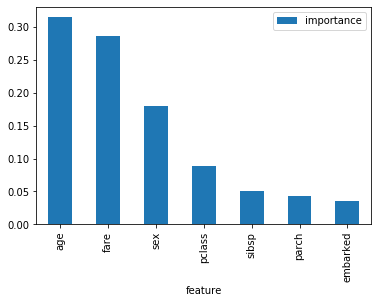

In [37]:
importance.plot.bar()

In [38]:
decisiontreemodel = model[5]
importance = pd.DataFrame({'feature' :titanic.iloc[:, 1:8].columns, 'importance':np.round(decisiontreemodel.feature_importances_, 3)})
importance = importance.sort_values('importance', ascending = False).set_index('feature')
importance

,importance
feature,
fare,0.259
age,0.244
sex,0.228
pclass,0.124
sibsp,0.084
parch,0.038
embarked,0.024


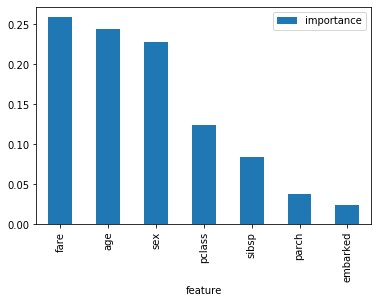

In [39]:
importance.plot.bar()

In [40]:
predictions = model[5].predict(X_test)
print(predictions)
print()
print(Y_test)

[0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0]


In [41]:
predictions = model[6].predict(X_test)
print(predictions)
print()
print(Y_test)

[0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0]
